In [23]:
#미국(US), 일본(JP), 유럽(EZ), 한국(KR)의 과거 20년간 주식 가격의 PCA

#conda install pandas-datareader
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100
data

,US,JP,EZ,KR
DATE,,,,
1998-01-01,100.000000,100.000000,100.000000,100.000000
1998-02-01,105.558684,104.762612,107.520788,110.512583
1998-03-01,111.220340,104.364834,118.014321,110.049659
1998-04-01,114.662908,100.848374,126.572835,93.472772
1998-05-01,113.950925,100.201365,129.253665,74.976854
...,...,...,...,...
2017-08-01,222.240836,133.126191,160.043798,498.806919
2017-09-01,226.065210,135.244650,162.465740,499.082569
2017-10-01,231.614360,141.958192,167.133520,517.372275


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPy

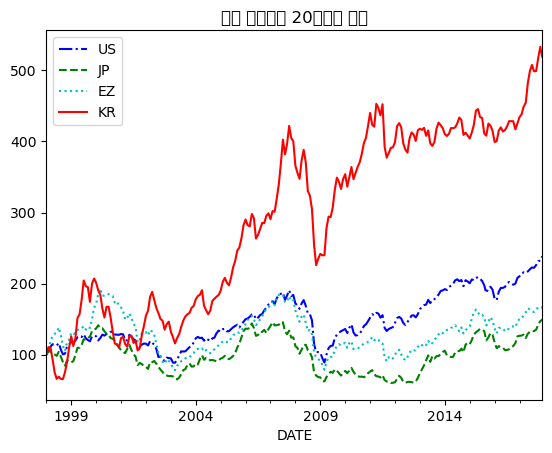

In [24]:
styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [8]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375382  -21.857069  -30.647655
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPy

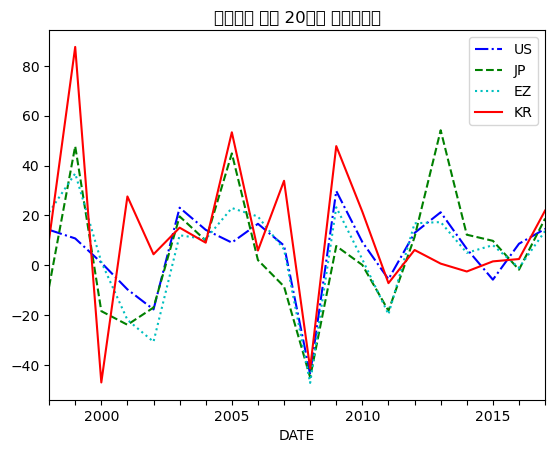

In [9]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()

In [11]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)

In [12]:
m = pca2.mean_

In [13]:
p1 = pca2.components_[0]

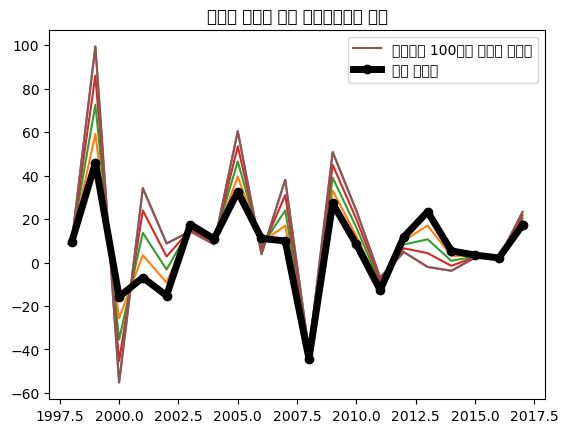

In [26]:
# 평균주가로부터 주성분이 더해질수록 어떻게 주가의 형태가 바뀌는지 살펴보면 다음과 같다. 
# 굵은 선으로 표시된 주가가 평균 주가이고 나머지 주가는 주성분이 점점 많이 추가됨에 따라 어떤 주가 형태로 변하는지를 표시한 것이다. 여기에서는 주성분의 모습을 잘 보기 위해 주성분을 과장하여 추가
import numpy as np
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [16]:
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["주성분 비중"]
print(df_w)

       주성분 비중
US -33.414856
JP -20.950674
EZ -26.904518
KR  81.270049


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/

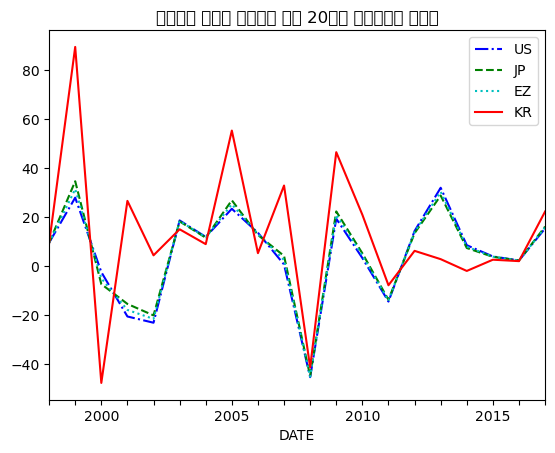

In [17]:
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()